In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [3]:
counts = pd.read_csv('/home/julia/data/12_16_20_21_humanPCW/GSE210543_RPE_PCW_counts.csv', index_col=0)
metadata = pd.read_csv('/home/julia/data/12_16_20_21_humanPCW/GSE210543_RPE_PCW_meta.csv', index_col=0)

In [4]:
adata = sc.AnnData(X=counts.T)

/tmp/ipykernel_19455/3417166442.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts.T)


In [5]:
adata.obs = metadata

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,pANN,DF.classifications,RNA_snn_res.0.6,seurat_clusters,sample,stage,orig.clust,S.Score,G2M.Score,Phase,nCount_SCT,nFeature_SCT,SCT_snn_res.0.6
GTCAGCGGTACTCCCT-1_1,15184,17265,4598,4.181871,0.000000,Singlet,0,0,21PCW,late,Fibroblasts,-0.015874,-0.037309,G1,13504,4597,0
TTAGGCAAGTCGCGAA-1_1,15184,15143,4462,5.382025,0.225806,Singlet,1,2,21PCW,late,Fibroblasts,-0.020515,-0.103439,G1,13329,4462,2
GAGGGATTCATCTATC-1_1,15184,9664,3247,5.639487,0.000000,Singlet,1,2,21PCW,late,Fibroblasts,0.039087,-0.071694,S,11463,3247,2
TTGTGTTGTCACAATC-1_1,15184,13895,4143,7.139259,0.032258,Singlet,0,0,21PCW,late,Fibroblasts,0.016317,-0.106089,S,13055,4143,0
GCGATCGTCTTTACAC-1_1,15184,25280,4655,5.704114,0.193548,Singlet,9,23,21PCW,late,T Cells,0.152280,-0.038394,S,13704,3995,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTACTCGCG-1,14823,4570,1749,3.085339,0.000000,Singlet,1,1,12PCW,early,Fibroblasts,-0.044321,-0.056278,G1,10976,1950,1
TTTGGTTTCGTAGGGA-1,14823,13411,3542,13.511297,0.028571,Singlet,6,5,12PCW,early,Ciliary Margin,-0.076033,-0.043626,G1,12809,3542,5
TTTGGTTTCTTGGTGA-1,14823,1259,722,0.238284,0.000000,Singlet,3,7,12PCW,early,Miotic Cells,-0.050012,0.085241,G2M,9736,2181,7
TTTGTTGCAACCGACC-1,14823,16921,4252,7.458188,0.228571,Singlet,0,4,12PCW,early,Fibroblasts,0.009883,-0.039298,S,13387,4252,4


In [7]:
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


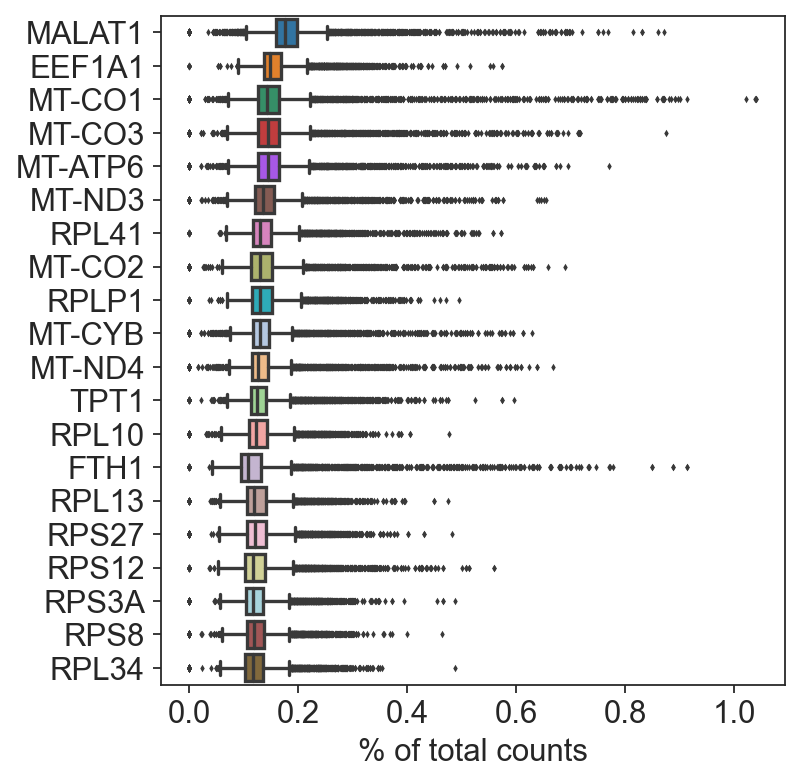

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


filtered out 493 genes that are detected in less than 3 cells


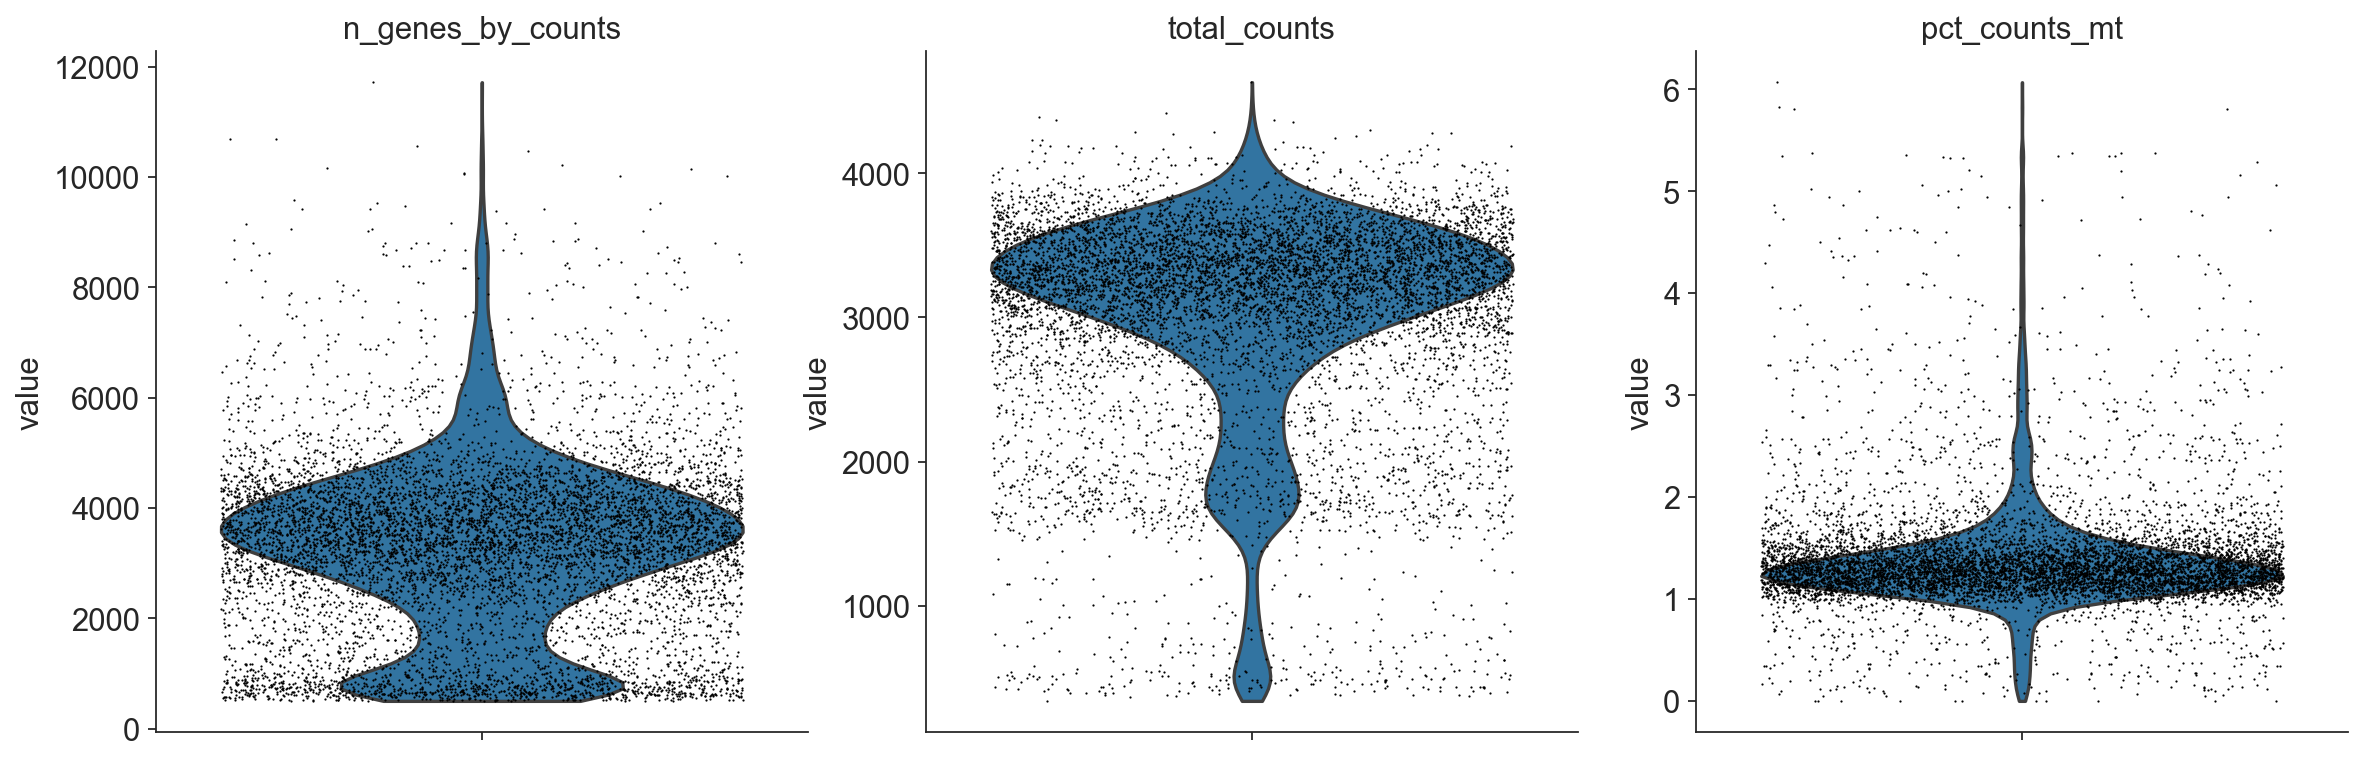

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)



In [11]:
adata = adata[adata.obs.n_genes_by_counts < 6500, :]
adata = adata[adata.obs.n_genes_by_counts > 1500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


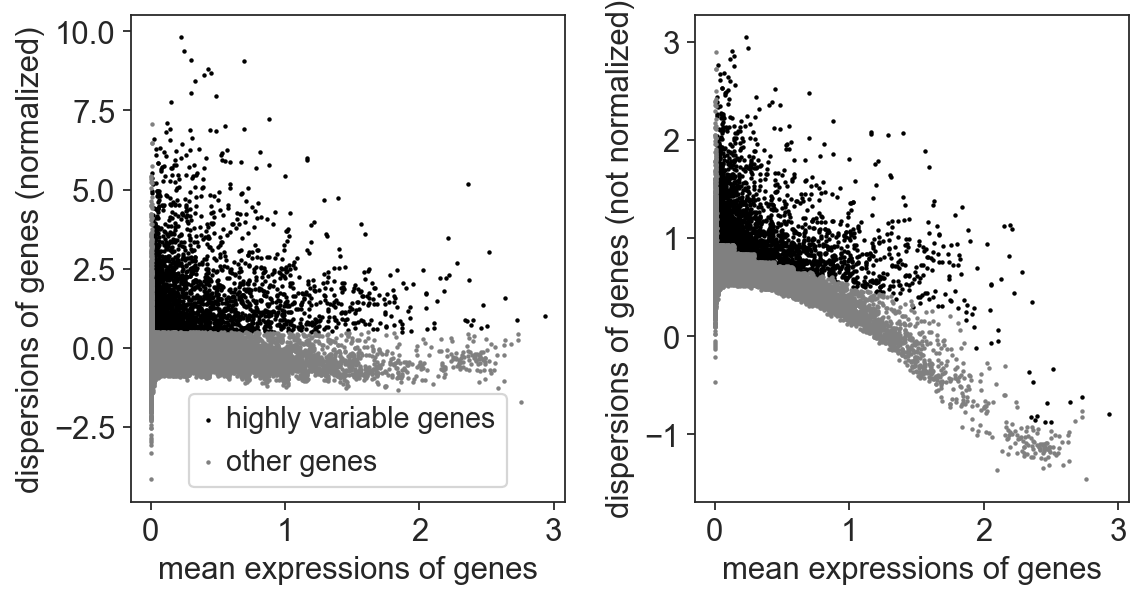

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata.raw = adata

In [13]:
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [14]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

computing UMAP


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


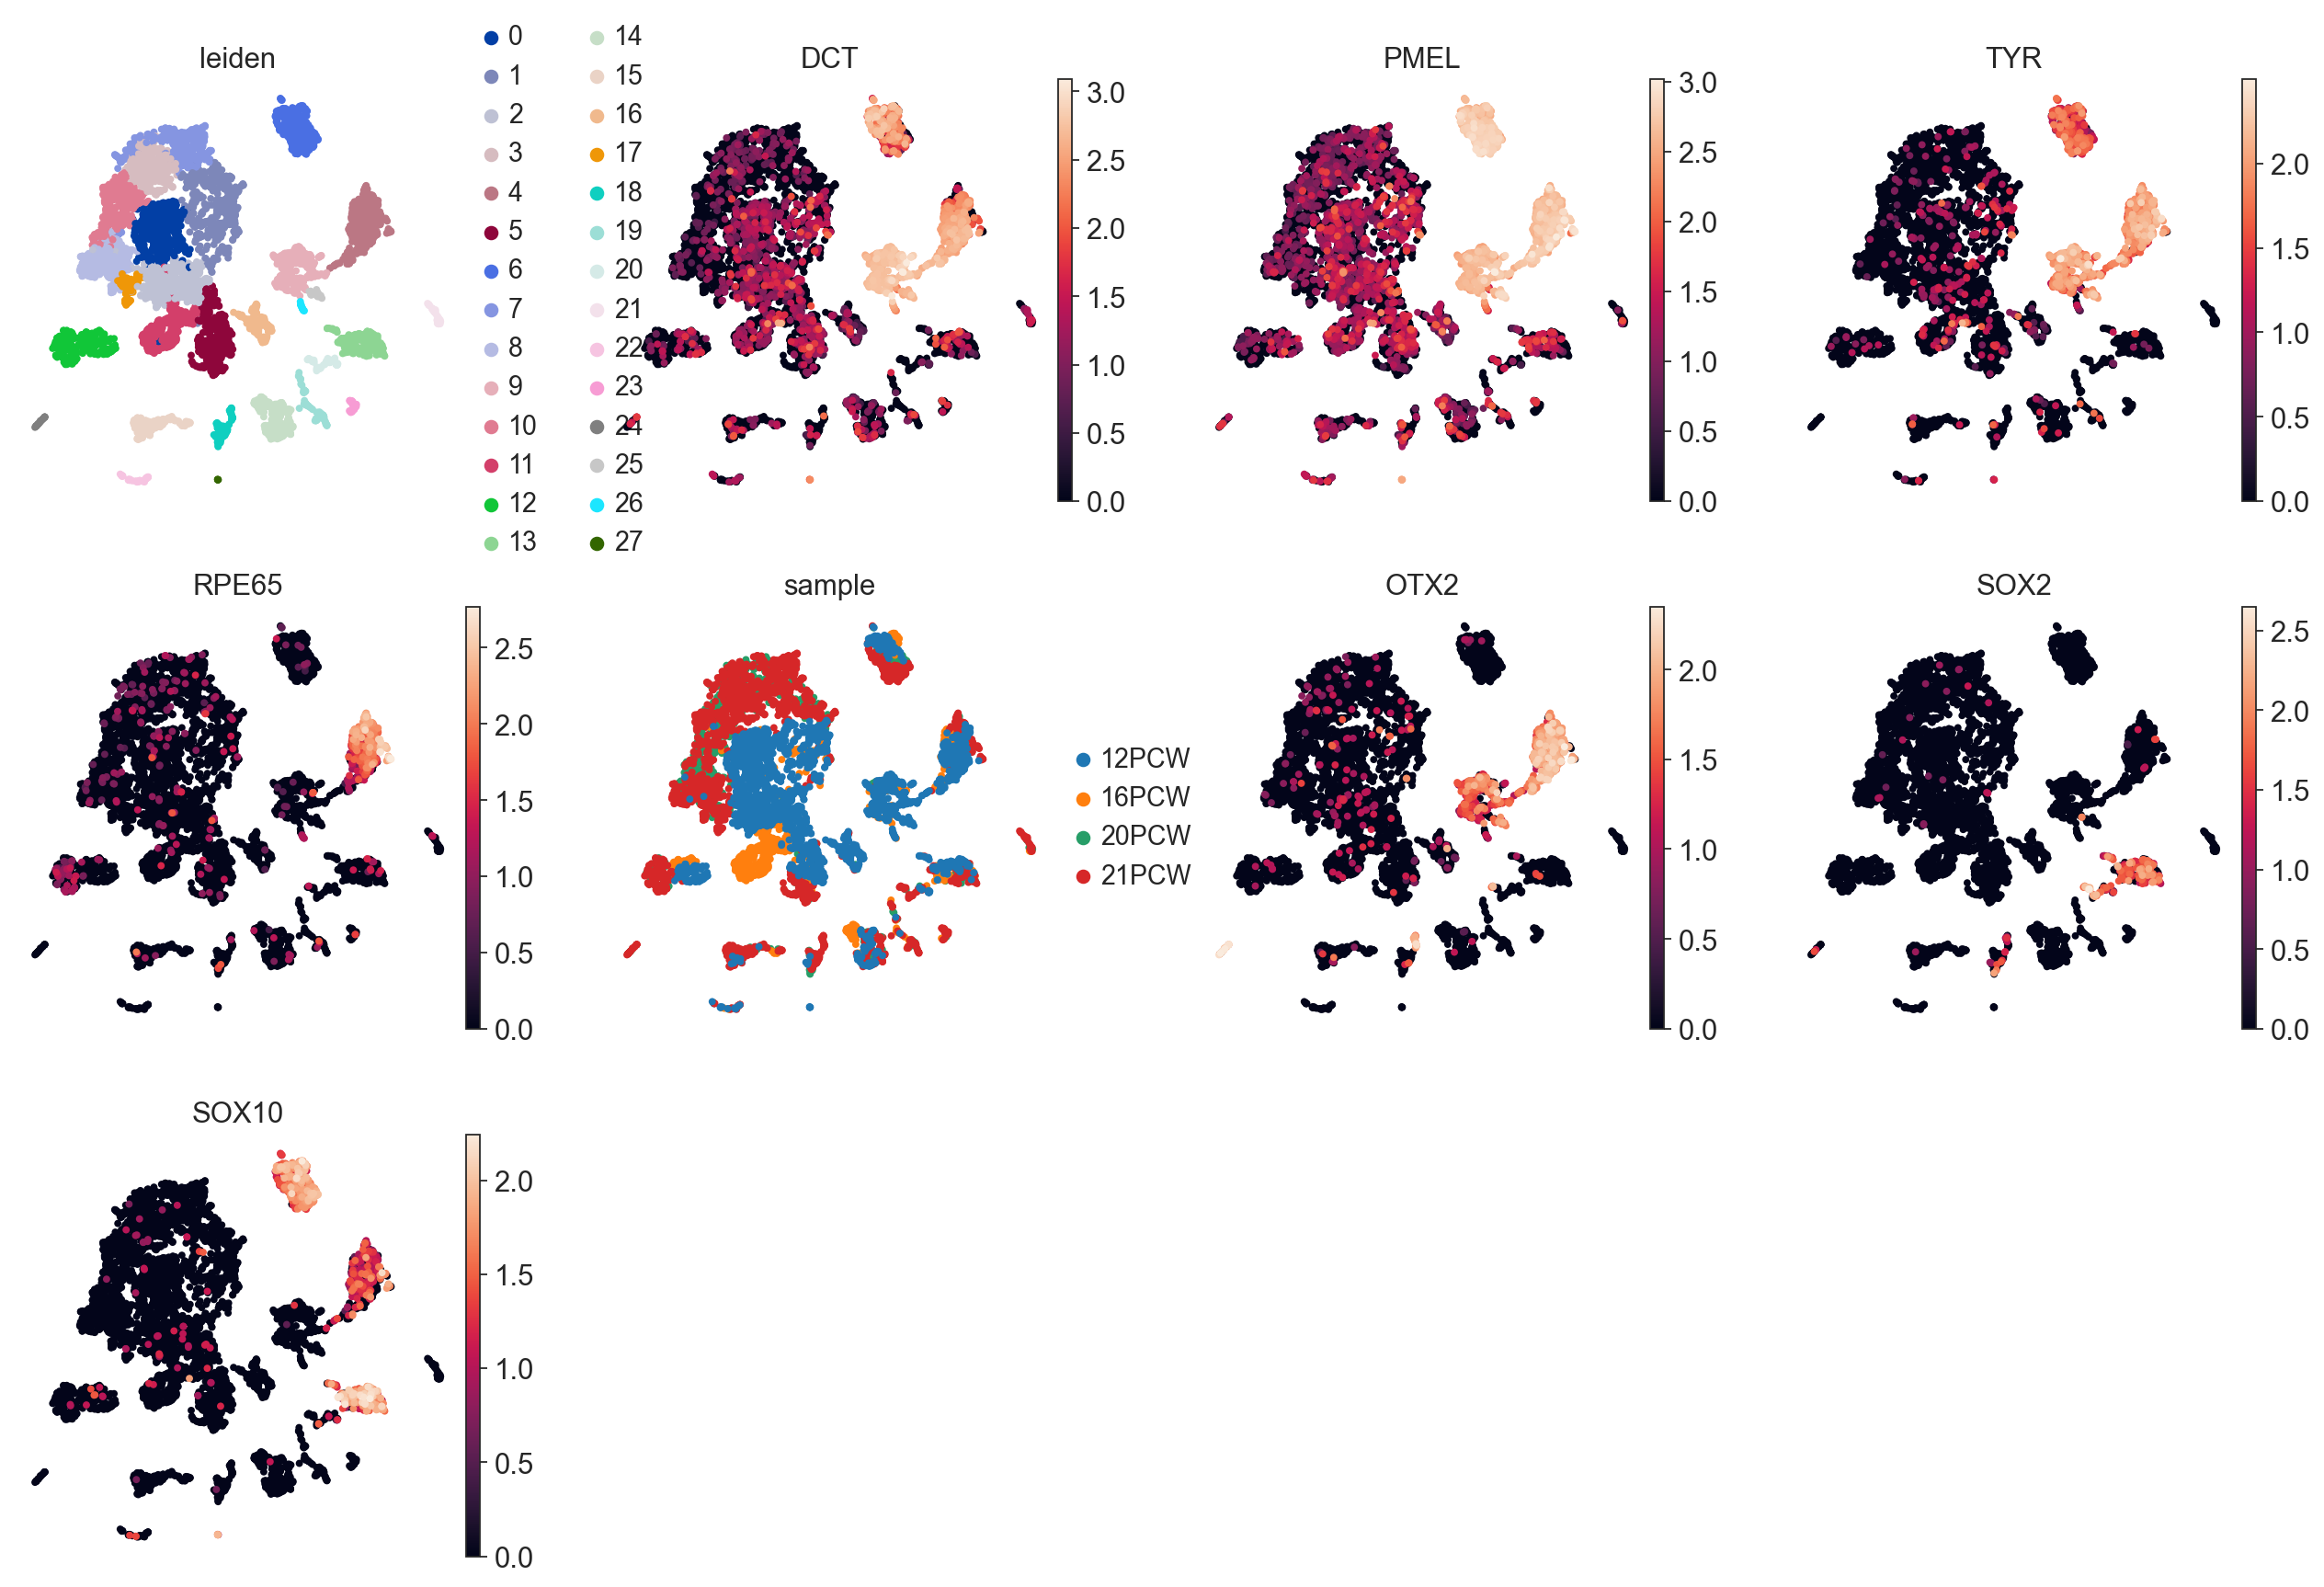

In [15]:
sc.pl.umap(adata, color=['leiden', 'DCT', 'PMEL', 'TYR', 'RPE65', 'sample', 'OTX2', 'SOX2', 'SOX10'], frameon=False, size=50)

In [34]:
adata.write_h5ad('/home/julia/GSE155121_human/h5ad/umap_W_12_16_20_21.h5ad')

In [16]:
adata_new=adata[adata.obs['leiden'].isin(['4', '25', '26','9','6'])]
adata_new

View of AnnData object with n_obs × n_vars = 1193 × 2874
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'DF.classifications', 'RNA_snn_res.0.6', 'seurat_clusters', 'sample', 'stage', 'orig.clust', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.6', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
adata_new=adata_new.raw.to_adata()
sc.pp.highly_variable_genes(adata_new, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_new.raw = adata_new
adata_new = adata_new[:, adata_new.var.highly_variable]
sc.pp.scale(adata_new, max_value=10)
sc.tl.pca(adata_new, svd_solver='arpack', n_comps =100)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=100


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)


In [18]:
sc.pp.neighbors(adata_new, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata_new)
sc.tl.leiden(adata_new, resolution=0.5)


computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


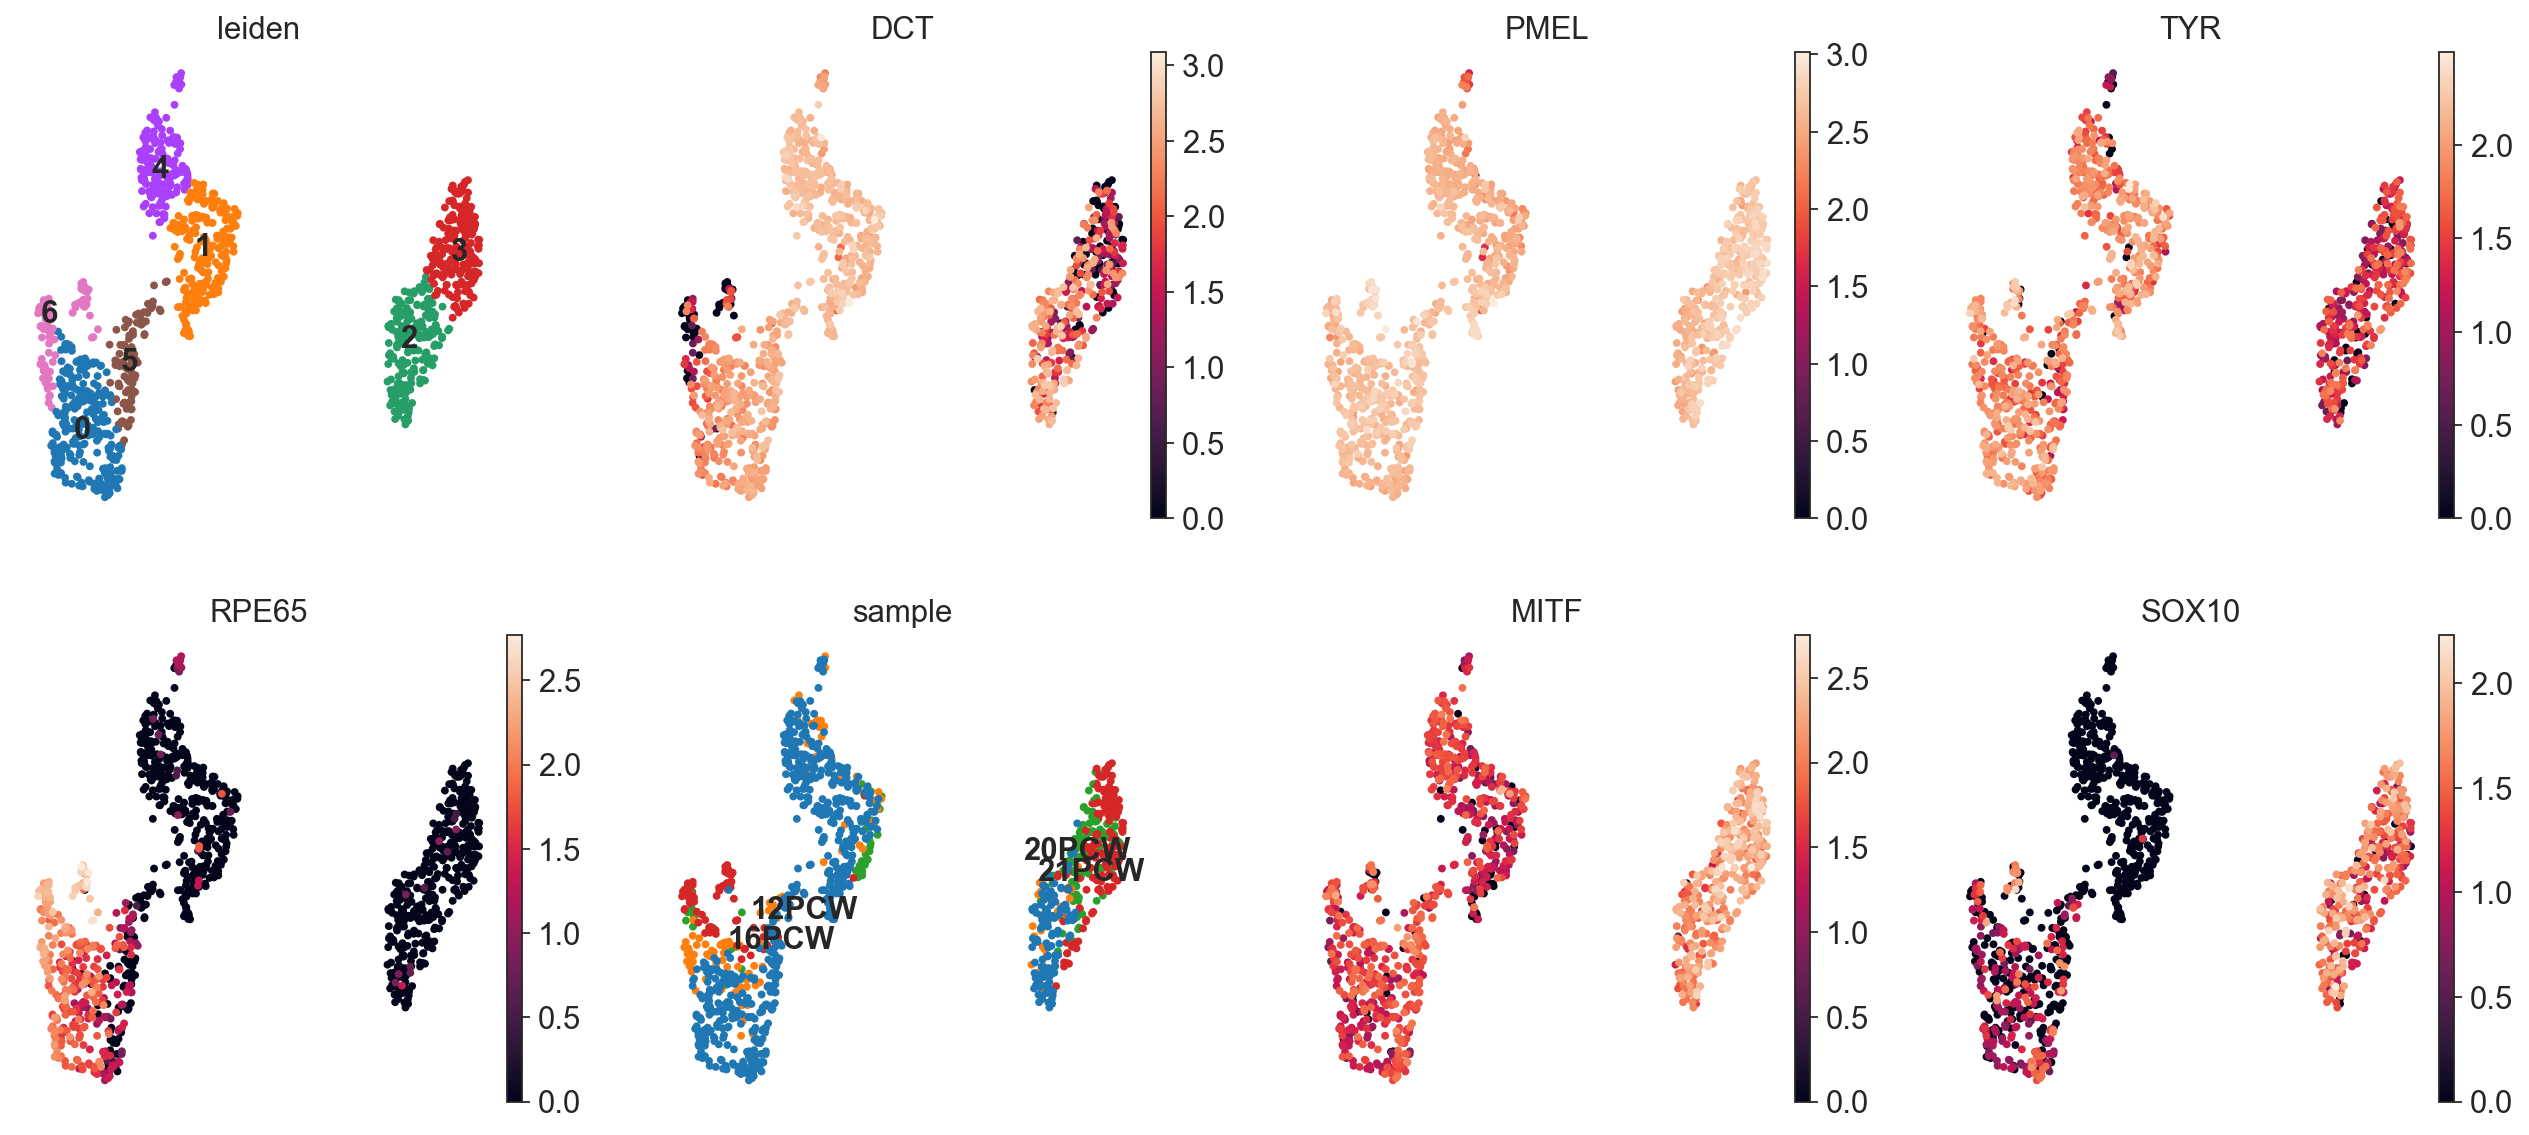

In [19]:
sc.pl.umap(adata_new, color=['leiden', 'DCT', 'PMEL', 'TYR', 'RPE65', 'sample', 'MITF', 'SOX10'], frameon=False, size=50, legend_loc='on data')

In [21]:
adata_new.write('/home/julia/data/12_16_20_21_humanPCW//h5ad/12_16_20_21_umap_working_.h5ad')

In [22]:
adata1=sc.read_h5ad('/home/julia/data/12_16_20_21_humanPCW//h5ad/12_16_20_21_umap_working_.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


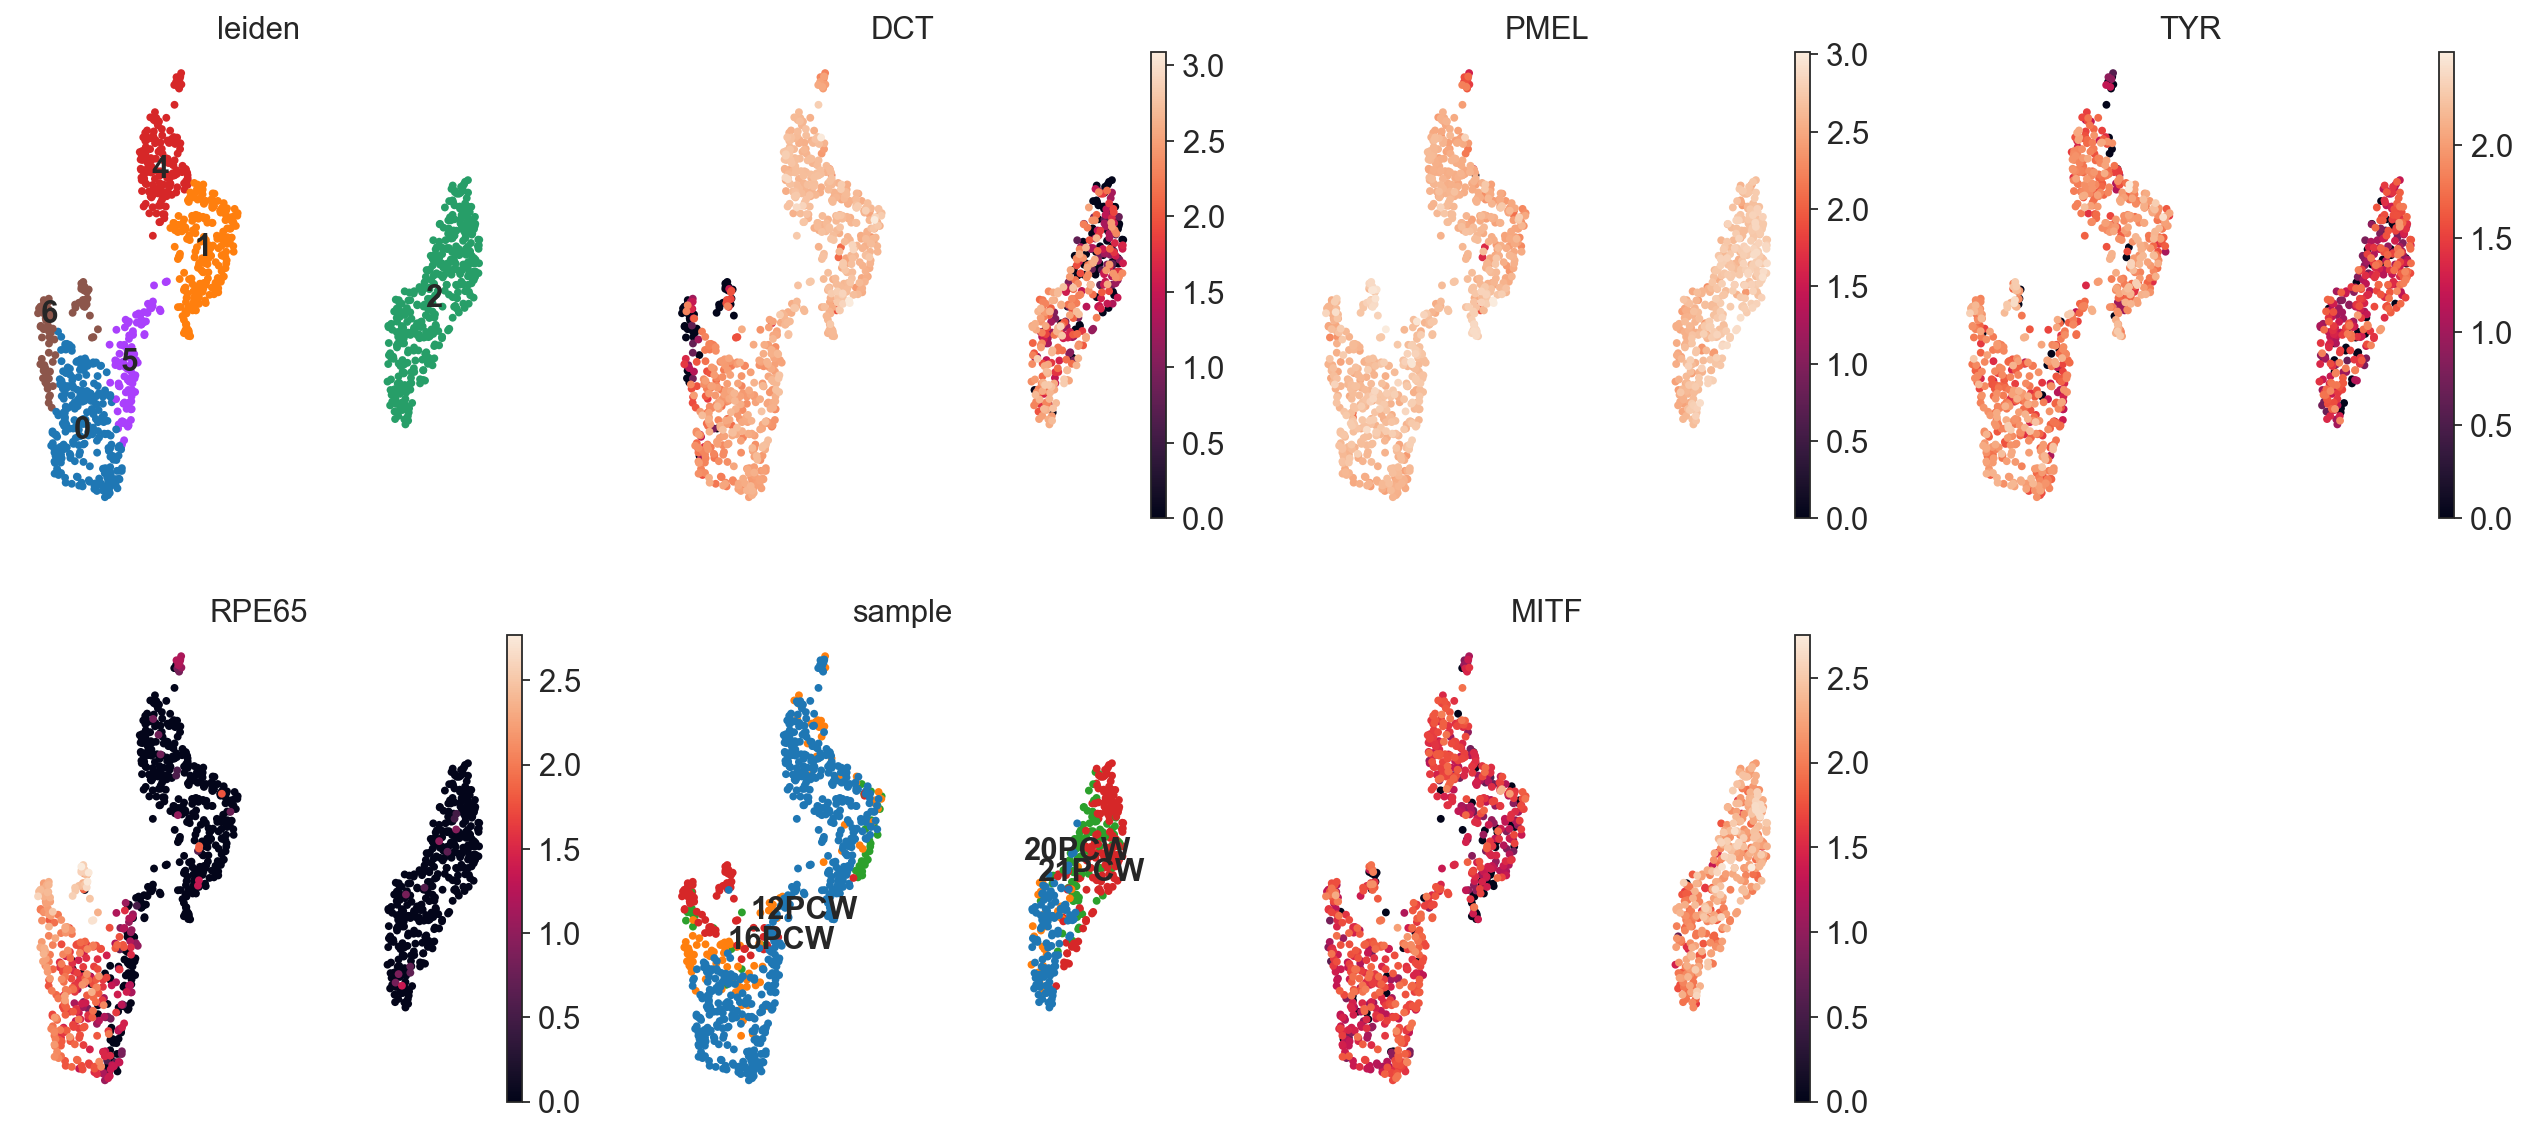

In [23]:
sc.pl.umap(adata1, color=['leiden', 'DCT', 'PMEL', 'TYR', 'RPE65', 'sample', 'MITF'], frameon=False, size=50, legend_loc='on data')

In [8]:
adata1.obs['leiden'][adata1.obs['leiden'].isin(['3'])]='2'
adata1.obs['leiden']=adata1.obs['leiden'].astype('str').astype('category')

In [11]:
adata1.write('/home/julia/data/GSE210543_human_eye/h5ad/12_16_20_21_umap_working_.h5ad')

In [71]:
RPE_all=["TTR", "PTGDS", "DCT",  "RGR", "RPE65", "RDH5", "MALAT1",  "GPNMB", "MGLL", "TRPM3", "KCNJ13", "ARL6IP1", "CHCHD10", "ENPP2", "SLC16A8", 
         "SLC24A5", "TYR", "KRT18",  "SYT4", "MLANA", "LRAT", "EDNRB", "RLBP1", "CITED1", "PMEL", "MT3", "GSTP1",
         "BNC2", "TFCP2", "ZBTB37", "MTF1", "AEBP2",  "GTPBP6", "ZSCAN21", "KDM4A", "HMBOX1", "RCOR1", "USP39", 
         "RBM22", "CREBL2", "OTUD4", "NUAK2", "SP4", "HIVEP3", "TERF2", "PIR", "RXRA", "CPEB1", "TRIM24", "XRCC4", "DMAP1",
         "ZFP62", "RORC",  "PARP1", "NELFA", "ZCCHC14", "GZF1", "PIK3C3",  "LCOR", 
         "KDM4C", "RBPJ" ]

In [18]:
Melano_all=["MLPH", "FMN1", "SLC24A5", "ATP1A1", "TYRP1", "TECPR1", "GPNMB", "MGLL", "TRPM1", "TYR",
              "RAB38", "MYO5A", "GSTA4", "CDK2", "GJB2", "GJB6", "DCT", "SLC45A2", "SYNGR1", "SCN8A", "SYT4", 
              "MLANA", "LBH", "EDNRB", "NEAT1", "CITED1", "PMEL", "STMN3", "DKK3", "CCK", "CYB5A", "SPP1", "FABP3",
            "S100B",  "GSTP1",
         #  "APEX1", "ELK4", "ZDHHC5", "ETS2",  "ZXDC", "TCF3", "PHTF1", "GAR1", "ETV1", "HMGXB3", "NOC2L", "NMI"
           ]

In [ ]:
clusters_ordered = ['2', '0', '1','4','5','6']  # specify the order
adata1.obs['leiden'] = adata1.obs['leiden'].cat.reorder_categories(clusters_ordered)

In [203]:
mel_rpe=["GJB6", "SYT4", "GJB2","SPP1","SCN8A", "TECPR1","STMN3",  "CCK","MGLL","FABP3", "DKK3",
 "CDK2", "CITED1","FMN1",  "GSTA4","SLC24A5", "ATP1A1", "TYRP1",  "GPNMB",  "MLPH", "TRPM1", "TYR",
 "DCT", "SLC45A2", "S100B","LBH", "CYB5A", "SLC4A5", "SYNGR1",  "GSTP1","PON1","MT3","SLC24A1","ACSL6",
"SLC1A1","RD3L",  "CLTRN", "COL4A4","LRAT","STRA6", "RDH10", "ABHD2","EZR", "TMEM56",  "ERMN","RPE65", 
 "SLC6A13","COL9A3", "OTX2","ARL6IP1",   "RGR",  "TTR", "RDH5", "ITGB8", "ENPP2", "SLC16A8", "KRT18", 
"CSPG5", "INPP5K", "RLBP1",  "BSG",  "CST3",  "TMEM98", "BASP1","TRPM3",  "ATP1B1","SLC2A1","CLU","RBP1",]

In [281]:
mel_rpe11=[   "CCK",  "GJB6", "SYT4", "GJB2","SPP1","SCN8A", "TECPR1", "STMN3", "MGLL", "FABP3", "SLC45A2",
"SYNGR1",  "S100B",   "DCT",  "CDK2",  "CITED1","FMN1", "MLPH", "MYO5A",  "GSTA4",   "EDNRB", "ATP1A1",   "GPNMB", 
"NEAT1", "RAB38", 'MLANA',"TYRP1","PMEL", "SLC24A5", "DKK3",  "CYB5A", "LBH", "TRPM1", "TYR", "GSTP1", "SLC4A5", 
"PON1","MT3","SLC24A1","ACSL6", "SLC1A1","RD3L", "CLTRN", "COL4A4","LRAT", 
"TMEM56",  "ERMN", "ABHD2","EZR", "RPE65", "SLC6A13","RGR",  "TTR",  "RDH5", "ITGB8",  "ENPP2", "SLC16A8",  "CSPG5",
"INPP5K", "RLBP1","COL9A3",   "ARL6IP1",  "KRT18","OTX2","BSG",  "CST3",  "TMEM98", "BASP1","TRPM3",  "STRA6",  "ATP1B1","SLC2A1","CLU","RBP1",    "RDH10",]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


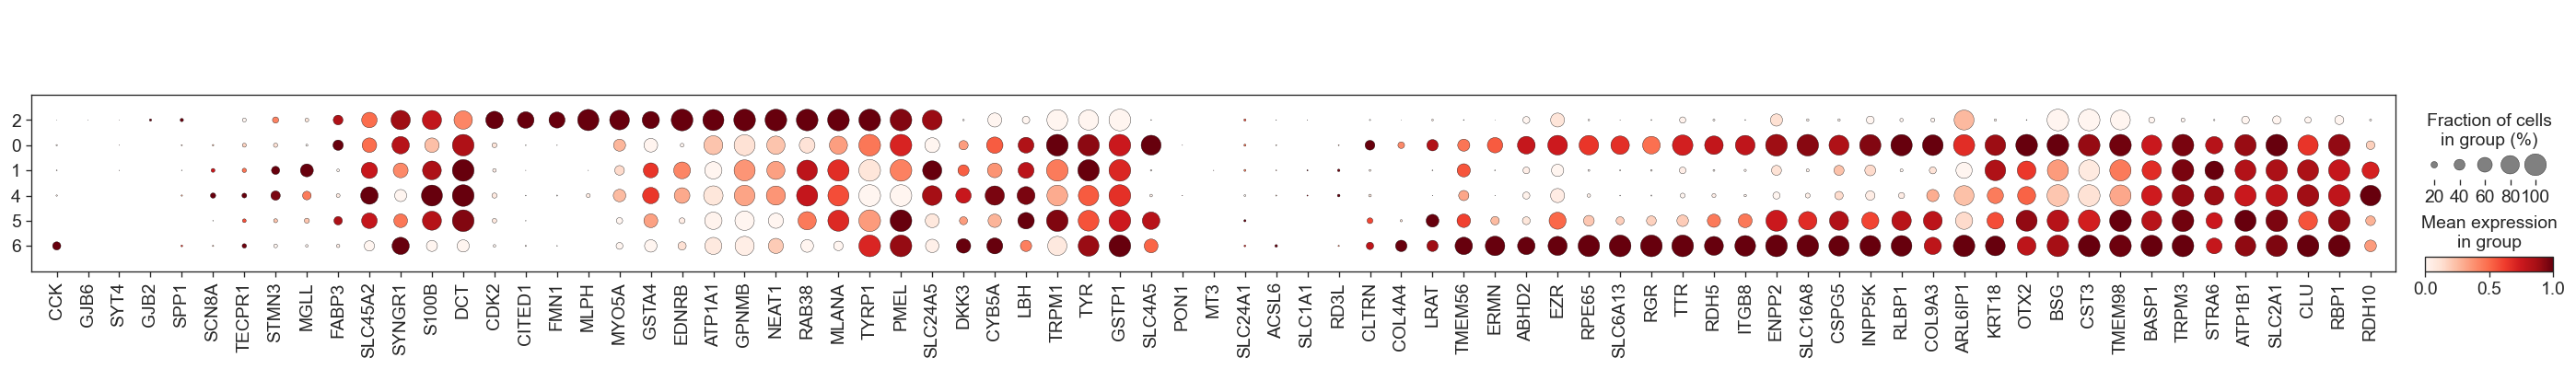

In [288]:
sc.pl.dotplot(adata1, mel_rpe11, groupby='leiden', use_raw=False, show=True, standard_scale='var')

In [287]:
mel_rpe111=[    "GJB6", "SYT4", "GJB2","SPP1","SCN8A", "TECPR1",
    
           
              "STMN3", "MGLL",
           
   "FABP3", "SLC45A2",       "SYNGR1",  "S100B",   "DCT",   "CDK2",  "CITED1","FMN1", "MLPH", "MYO5A",  "GSTA4",   "EDNRB",
  "ATP1A1",   "GPNMB", 
            "NEAT1", "RAB38", 'MLANA',"TYRP1","PMEL", "SLC24A5", "DKK3",  "CYB5A",
               
              "LBH",    
           "TRPM1", "TYR", 
           "GSTP1", "SLC4A5","CCK", 
           
           
           
           "PON1","MT3","SLC24A1","ACSL6", "SLC1A1","RD3L",  
     "CLTRN", "COL4A4","LRAT", 
      "TMEM56",  "ERMN", "ABHD2","EZR", "RPE65", "SLC6A13",
     "RGR",  
    "TTR",  "RDH5", "ITGB8", 
          "ENPP2", "SLC16A8",  "CSPG5", "INPP5K",
         "RLBP1","COL9A3",   "ARL6IP1",  "KRT18","OTX2","BSG", 
         "CST3",  "TMEM98", "BASP1","TRPM3",  "STRA6",  "ATP1B1","SLC2A1","CLU","RBP1",    "RDH10",]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


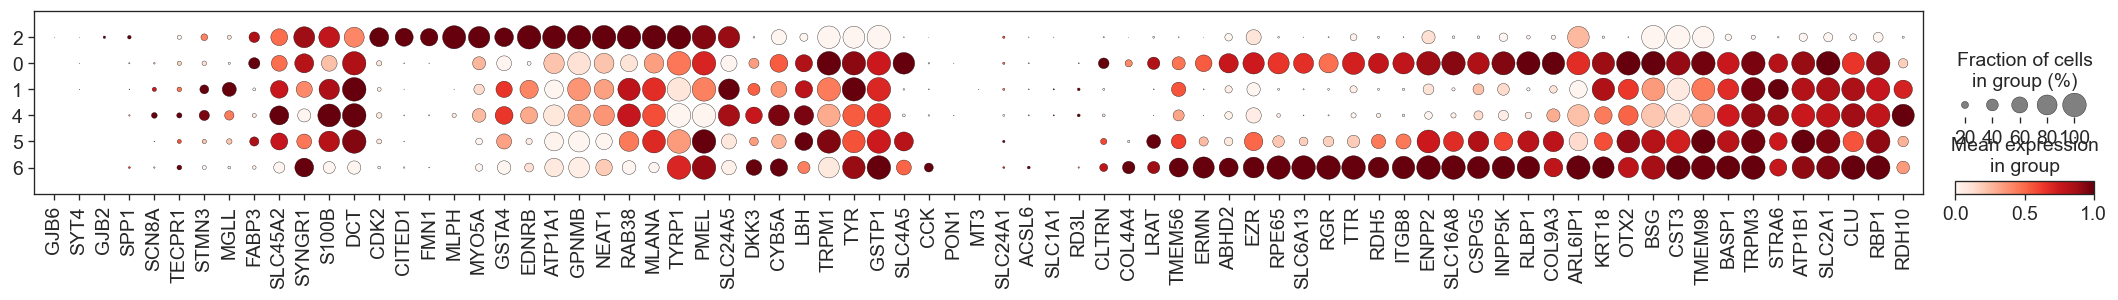

In [298]:
sc.pl.dotplot(adata1, mel_rpe111, groupby='leiden', use_raw=False, show=True, standard_scale='var', figsize=(22, 2), 
             save='12_21_leiden.svg'
             )